## Импорты


In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import ravel
from deep_translator import GoogleTranslator
import os

import scipy
import joblib
import re
import glob
import sklearn
from math import sqrt
from decimal import Decimal


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error





In [3]:

print(os.getcwd())

/home/savr/zadanie_zhilie


In [4]:
# Визуализация
import seaborn as sns

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150
pd.set_option('display.max_columns', None)
# scipy.test()

# Препроцессинг


## Выгрузка данных и объединение


In [5]:
df = pd.read_csv('_data.csv')
display(df)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,

## Чистка данных (Работаем с NuN, фильтруем лишнюю информацию, разбиваем по колонкам)

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')


In [7]:
# Удаляем дубликаты по ID объявления
df = df.drop_duplicates(subset=['ID  объявления'], keep='first').reset_index(drop = True)

In [8]:
display(df)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,

In [9]:
# Удаляем не нужные столбцы
df = df.drop(['Unnamed: 0', 'ID  объявления', 'Телефоны', 'Описание', 'Название ЖК', 'Серия дома', 'Ссылка на объявление'], axis = 1)

In [10]:
# Заполняем нан в количество комнат, ремонт 
df['Количество комнат'] = df['Количество комнат'].fillna('Без информации')
df['Парковка'] = df['Парковка'].fillna('Свободная парковка')
df['Площадь комнат, м2'] = df['Площадь комнат, м2'].fillna('Без информации')
df['Балкон'] = df['Балкон'].fillna('Без информации')
df['Окна'] = df['Окна'].fillna('Без информации')
df['Санузел'] = df['Санузел'].fillna('Без информации')
df['Балкон'] = df['Балкон'].fillna('Без информации')
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna('Без информации')
df['Высота потолков, м'] = df['Высота потолков, м'].fillna('Без информации')
df['Мусоропровод'] = df['Мусоропровод'].fillna('Без информации')

In [11]:
display(df)

,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,Без информации,Без информации,Без информации,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,Без информации,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,Без информации,Без информации,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации
3,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,14-42-20-19,Без информации,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации
4,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Свободная парковка,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,20 18,Без информации,На улицу и двор,Совмещенный (2),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,Без информации,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,Свободная парковка,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",Евроремонт,Без информации,Балкон (1),Без информации,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации
23364,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",Свободная парковка,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",Евроремонт,Без информации,Лоджия (1),Во двор,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации
23365,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",Свободная парковка,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Дизайнерский,Без информации,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,NaN,Без информации
23366,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Евроремонт,Без информации,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Пасс (3),Да


In [12]:
# Добавляем новый столбец, и заполняем типом квартиры из кол-во комнат, а там где нет кол-во, заполняем стандартом
df['Тип'] = [row.split(', ')[-1] if len(row) != 1 else 'Стандарт' for row in df['Количество комнат']]

In [13]:
display(df['Тип'])

0              Стандарт
1              Стандарт
2          Оба варианта
3          Оба варианта
4              Стандарт
              ...      
23363    Без информации
23364          Стандарт
23365      Оба варианта
23366          Стандарт
23367      Оба варианта
Name: Тип, Length: 23368, dtype: object

In [14]:
# Изменяем колонку кол-во комнат оставляя там только кол-во квартир, а там где нет ко-во ставим 0
df['Количество комнат'] = [int(row.split(', ')[0]) if len(row.split(', ')[0]) == 1 else 0 for row in df['Количество комнат']]

In [15]:
display(df['Количество комнат'])

0        4
1        4
2        4
3        4
4        2
        ..
23363    0
23364    1
23365    2
23366    2
23367    2
Name: Количество комнат, Length: 23368, dtype: int64

In [16]:
# Обрабатываем колонку метро
df['Метро'] = df['Метро'].astype(str)
# Извлечение первого элемента после разделения по ' ('
df['Метро'] = [row.split(' (')[0] for row in df['Метро']]

# Извлечение второго элемента после разделения по '. '
# с проверкой на наличие второго элемента
df['Метро'] = [row.split('. ')[1] if '.' in row else row for row in df['Метро']]

In [17]:
display(df['Метро'])

0        Смоленская
1        Смоленская
2        Смоленская
3        Смоленская
4         Арбатская
            ...    
23363      Говорово
23364      Солнцево
23365      Солнцево
23366      Солнцево
23367      Говорово
Name: Метро, Length: 23368, dtype: object

In [18]:
# Обрабатываем колонку с площадью, берём только общую площадь
df['Площадь кв, м2'] = [row.split('/')[0] for row in df['Площадь, м2']]
# df['Площадь жилая, м2'] = [row.split('/')[1] if len(row) > 6 else 0 for row in df['Площадь, м2']]
# df['Площадь кухни, м2'] = [row.split('/')[-1] if len(row) > 6 else 0 for row in df['Площадь, м2']]

In [19]:
display(df['Площадь кв, м2'])

0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.1
23366     52.5
23367     90.0
Name: Площадь кв, м2, Length: 23368, dtype: object

In [20]:
# Удаляем колонку со старой площадью
df = df.drop(['Площадь, м2'], axis = 1)
df = df.drop(['Площадь комнат, м2'], axis = 1)

In [21]:
# Обрабатываем колонку "парковка"
df['Парковка'] = df['Парковка'].replace(to_replace ='открытая', value = 'бесплатная во дворе', regex = True)
df['Парковка'] = df['Парковка'].replace(to_replace ='наземная', value = 'платная во дворе', regex = True)
df['Парковка'] = df['Парковка'].fillna('бесплатная во дворе')

In [22]:
display(df['Цена'])

0        500000.0 руб./ За месяц, Залог - 500000 руб., ...
1        500000.0 руб./ За месяц, Залог - 500000 руб., ...
2        500000.0 руб./ За месяц, Залог - 500000 руб., ...
3        400000.0 руб./ За месяц, Залог - 400000 руб., ...
4        225000.0 руб./ За месяц, Залог - 225000 руб., ...
                               ...                        
23363    42000.0 руб./ За месяц, Залог - 42000 руб., Ко...
23364    45000.0 руб./ За месяц, Залог - 45000 руб., Ко...
23365    50000.0 руб./ За месяц, Залог - 50000 руб., Ко...
23366    55000.0 руб./ За месяц, Залог - 50000 руб., Ко...
23367    57000.0 руб./ За месяц, Залог - 60000 руб., Ко...
Name: Цена, Length: 23368, dtype: object

In [23]:
df[['Основная стоимость', 'Дополнительная информация']] = df['Цена'].str.split(' руб./', expand=True)

df = df.drop(['Цена'], axis = 1)

# Вывод измененного DataFrame
display(df)

,Количество комнат,Тип,Метро,Адрес,Дом,Парковка,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитный",подземная,Дизайнерский,Без информации,Без информации,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитно-кирпичный",подземная,Дизайнерский,Без информации,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",5/16,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ..."
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",5/6,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ..."
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15","12/26, Панельный",Свободная парковка,Евроремонт,Без информации,На улицу и двор,Совмещенный (2),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",10/14,Свободная парковка,Евроремонт,Балкон (1),Без информации,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус..."
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...","5/18, Монолитный",Свободная парковка,Евроремонт,Лоджия (1),Во двор,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус..."
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11","5/5, Кирпичный",Свободная парковка,Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,NaN,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...","8/23, Монолитный",платная во дворе,Евроремонт,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Пасс (3),Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."


In [24]:
print(df['Основная стоимость'].dtypes)

object


In [25]:
# Преобразование строк, представляющих числа с плавающей запятой, в float
df['Основная стоимость'] = pd.to_numeric(df['Основная стоимость'], errors='coerce')


In [26]:
print(df['Основная стоимость'].dtypes)

float64


In [27]:
# Обрабатываем колонку "балкон"
df['Балкон'] = df['Балкон'].fillna('Балкон (0), Лоджия (0)')
df['Лоджия'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Лоджия' else '(0)' for row in df['Балкон']]
df['Балкон'] = [row.split(' ')[1] if row.split(' ')[0] == 'Балкон' else '(0)' for row in df['Балкон']]

In [28]:
# Корректируем значения, избавляясь от скобок и переделывая из str в int
df['Лоджия'] = [row.split('(')[1] for row in df['Лоджия']]
df['Лоджия'] = [int(row.split(')')[0]) for row in df['Лоджия']]
df['Балкон'] = [row.split('(')[1] for row in df['Балкон']]
df['Балкон'] = [int(row.split(')')[0]) for row in df['Балкон']]

In [29]:
# Все пропущенные окна закидываем в категорию "во двор"
# Есть вариант раскидать по всем колонкам
df['Окна'] = df['Окна'].fillna('Во двор')

In [30]:
# Разбиваем колонку дом
df['Тип дома'] = [row.split(', ')[-1] if len(row.split(', ')[-1]) > 6 else 'Неизвестно' for row in df['Дом']]
df['Этажность дома'] = [int(row.split('/')[1].split(',')[0]) for row in df['Дом']]
df['Этаж квартиры'] = [int(row.split('/')[0]) for row in df['Дом']]
df = df.drop(['Дом'], axis = 1)

In [31]:
# Избавляемся от NaN, если меньше 5 этажей - нет лифта, в остальном по одному каждого лифта
df['Лифт'] = [row if row == row else
              ['Пасс (1), Груз (1)' if df['Этажность дома'].iloc[i]>5 else 'Пасс (0), Груз (0)'][0]
              for i, row in enumerate(df['Лифт'])]

In [32]:
# Разбиваем колонку с лифтами на две раздельные 
df['Лифт пасс'] = [row.split(' ')[1] if (row.split(' ')[0]) == 'Пасс' else '(0)' for row in df['Лифт']]
df['Лифт груз'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Груз' else '(0)' for row in df['Лифт']]

In [33]:
# Убираем скобки
df['Лифт пасс'] = [row.split('(')[1] for row in df['Лифт пасс']]
df['Лифт пасс'] = [int(row.split(')')[0]) for row in df['Лифт пасс']]
df['Лифт груз'] = [row.split('(')[1] for row in df['Лифт груз']]
df['Лифт груз'] = [int(row.split(')')[0]) for row in df['Лифт груз']]
df = df.drop(['Лифт'], axis = 1)

In [34]:
# Аналогичные операции с колонкой "Санузел"
df['Санузел'] = df['Санузел'].fillna('Совмещенный (1)')
df['Санузел совмещенный'] = [row.split(' ')[1] if (row.split(' ')[0]) == 'Совмещенный' else '(0)' for row in df['Санузел']]
df['Санузел раздельный'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Раздельный' else '(0)' for row in df['Санузел']]
df['Санузел совмещенный'] = [row.split('(')[1] for row in df['Санузел совмещенный']]
df['Санузел совмещенный'] = [int(row.split(')')[0]) for row in df['Санузел совмещенный']]
df['Санузел раздельный'] = [row.split('(')[1] for row in df['Санузел раздельный']]
df['Санузел раздельный'] = [int(row.split(')')[0]) for row in df['Санузел раздельный']]
df = df.drop(['Санузел'], axis = 1)

In [35]:
# Заполняем NaNы
df['Мусоропровод'] = df['Мусоропровод'].fillna('Нет')

In [36]:
# Преобразование всех значений в столбце в число с плавающей точкой
df['Высота потолков, м'] = pd.to_numeric(df['Высота потолков, м'], errors='coerce')

# Теперь вычисляем среднее значение и округляем его до двух знаков после запятой
average_height = round(df['Высота потолков, м'].mean(), 2)

# Заполняем пустые значения средним значением
df['Высота потолков, м'] = df['Высота потолков, м'].fillna(average_height)

In [37]:
# Проверяем, что всё сделали правильно:)
#df[df['Тип квартиры'].isin(['Стандарт'])]
# df[df['Ремонт'].isna()].tail(50)
# print(len(df['Высота потолков, м'].unique()))
# print(df['Высота потолков, м'].unique())
# print(df['Высота потолков, м'].value_counts())
# print(round(df['Высота потолков, м'].mean(), 2))

In [42]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.00,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.50,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.90,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",2.98,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


In [43]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.00,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.50,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.90,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",2.98,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


### Графики

In [44]:
# создаем графики зависимости категориальных данных к цене, то есть мы хотим понимать сильно ли влияет категория на стоимость дома
def plot_mean_price(column):
    plt.figure(figsize=(8, 4)) # определение размера графиков
    n_bars = np.arange(len(df[column].unique())) # массив с кол-во уникальных значений в каждой катег колонке.
    
    # создание дф по каждой колонке групируя категории по средней цене
    grouped = pd.DataFrame(df.groupby([column])['Основная стоимость'].mean().round())

    grouped.dropna(inplace=True)
    
    plt.title(column) #  заголовок
    plt.bar(n_bars, grouped['Основная стоимость']) # создание графика
    plt.xticks(n_bars, grouped.index); # подписываем колонки
    plt.xticks(rotation=45)
    plt.show() # чтобы не накладывался на один график

In [45]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.00,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.50,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.90,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",2.98,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


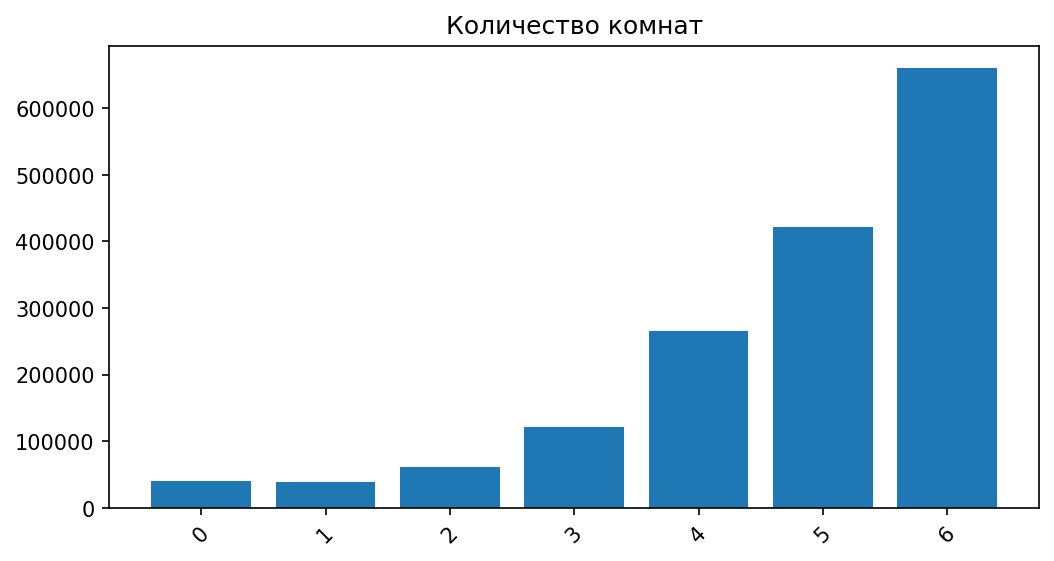

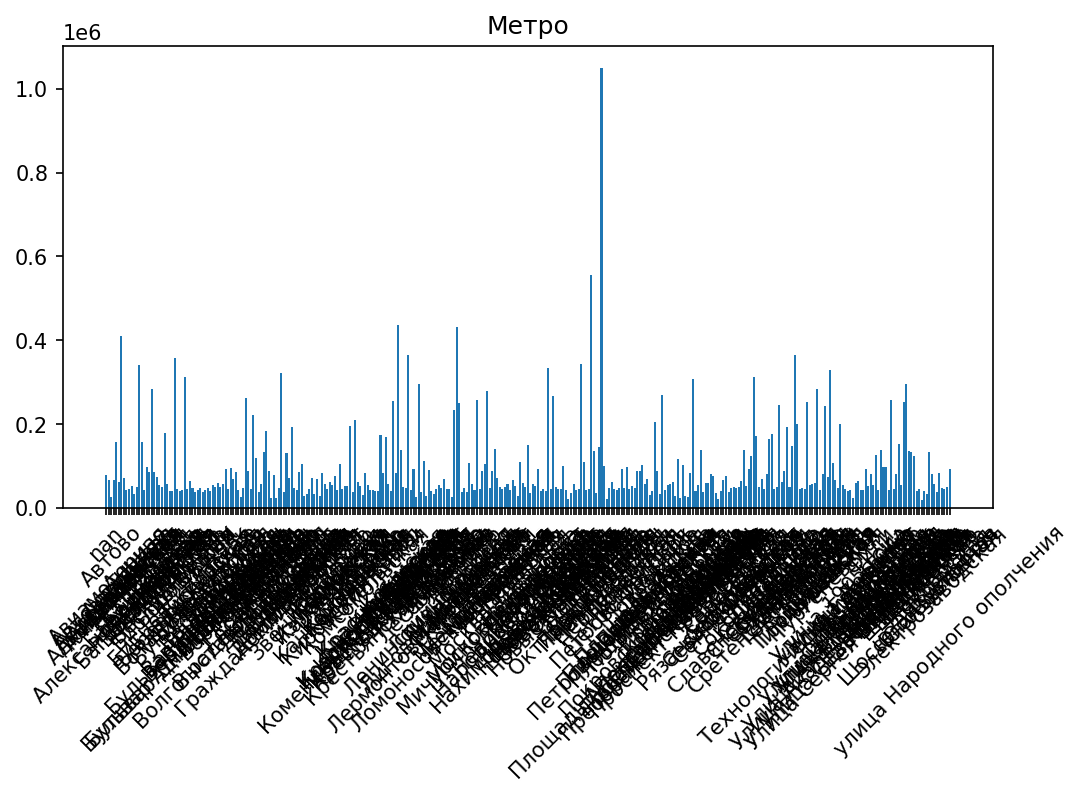

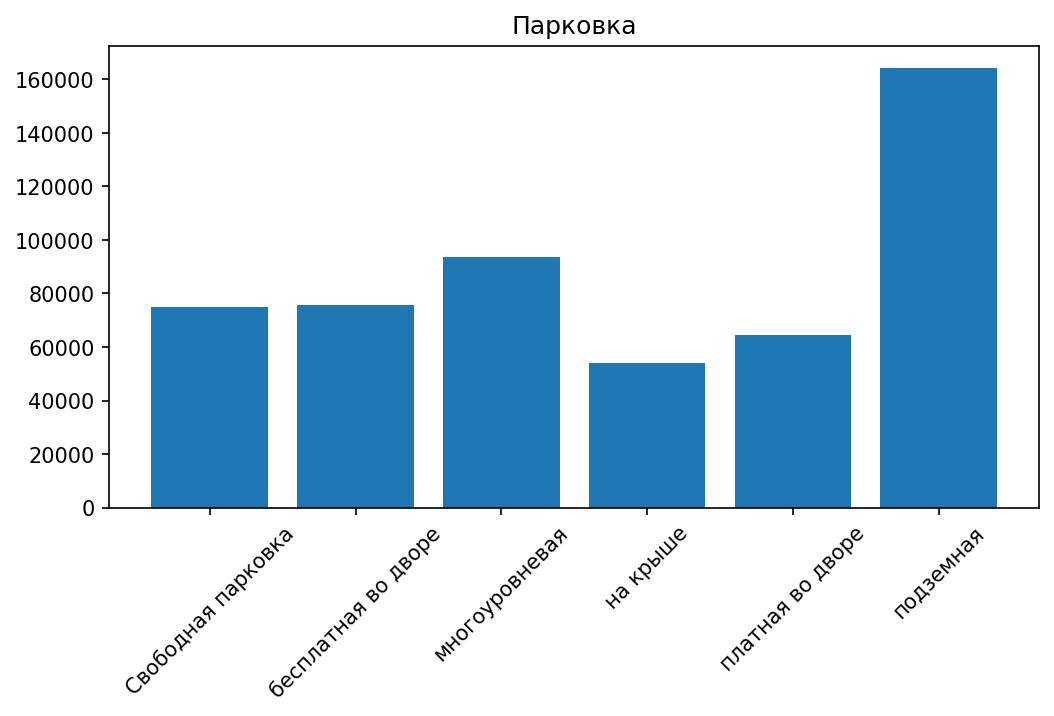

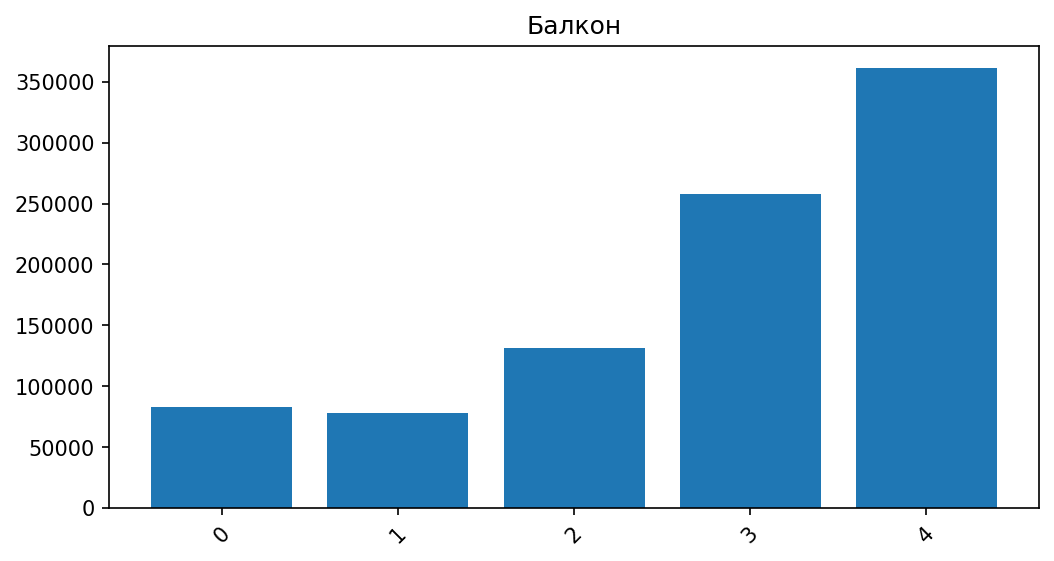

In [48]:
categorical = ['Количество комнат', 'Метро', 'Парковка', 'Балкон']
for col in categorical:
    plot_mean_price(col) #вызываем функцию дя построение графиков

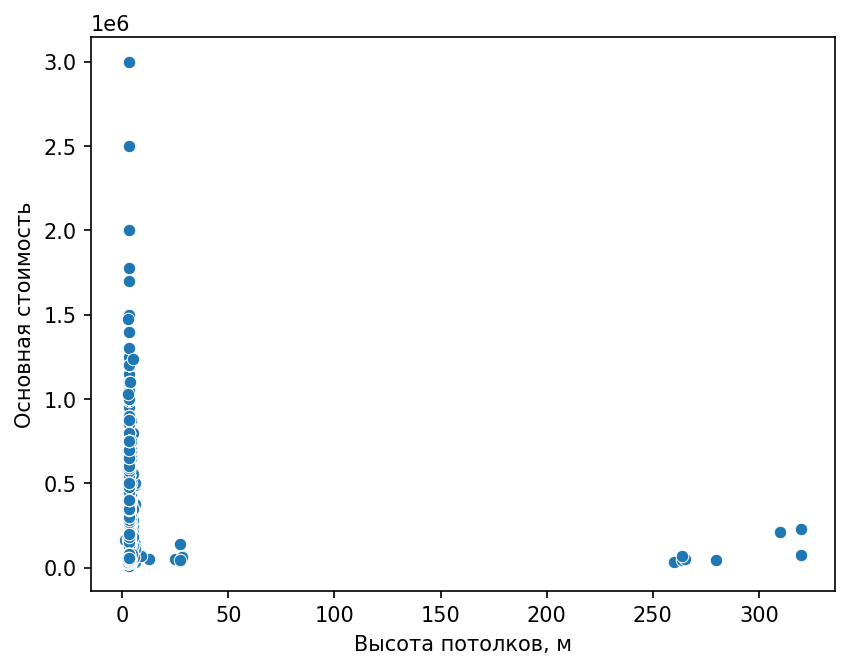

In [49]:
# График Высота потолков, м \ цена
df.dropna(subset=['Высота потолков, м'])

sns.scatterplot(data=df, x='Высота потолков, м', y='Основная стоимость');

<Axes: xlabel='Площадь кв, м2', ylabel='Основная стоимость'>

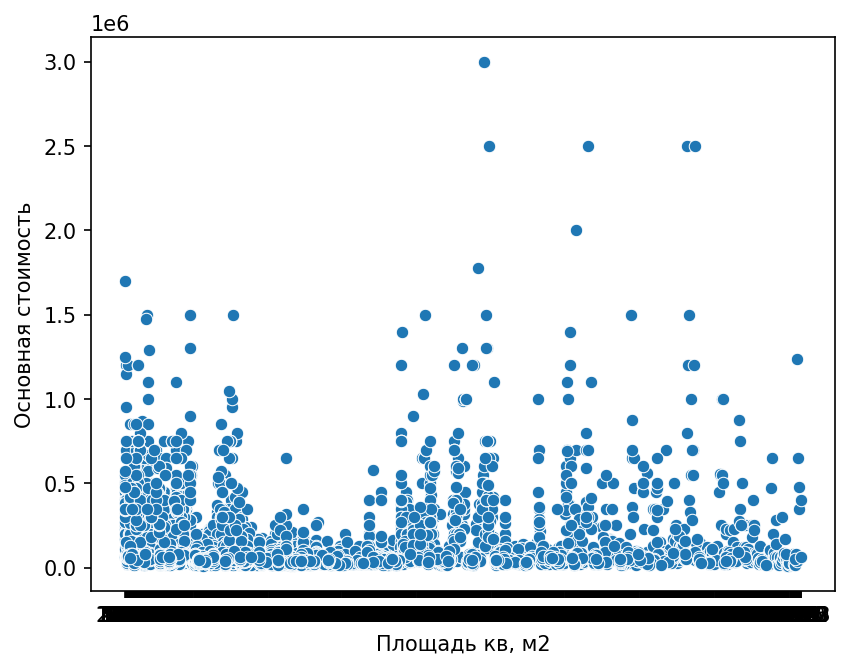

In [50]:
# График Суммарная площадь \ цена
sns.scatterplot(data=df, x='Площадь кв, м2', y='Основная стоимость')

In [51]:
# Вместо отдельного txt файла и импорта:)

VAO = [
    'Авиамоторная',
    'Андроновка',
    'Белокаменная',
    'Бульвар Рокоссовского',
    'Измайлово',
    'Измайловская',
    'Локомотив',
    'Лухмановская',
    'Новогиреево',
    'Новокосино',
    'Партизанская',
    'Первомайская',
    'Перово',
    'Преображенская площадь',
    'Семеновская',
    'Соколиная Гора',
    'Сокольники',
    'Улица Дмитриевского',
    'Черкизовская',
    'Шоссе Энтузиастов',
    'Щелковская',
    'Электрозаводская',
    'Стромынка',
]

ZAO = [
    'Багратионовская',
    'Боровское шоссе',
    'Киевская',
    'Кропоткинская',
    'Крылатское',
    'Кунцевская',
    'Кутузовская',
    'Ломоносовский проспект',
    'Минская',
    'Мичуринский проспект',
    'Молодежная',
    'Новопеределкино',
    'Озёрная',
    'Озерная',
    'Парк Победы',
    'Пионерская',
    'Проспект Вернадского',
    'Рабочий Посёлок',
    'Рабочий поселок',
    'Рабочий посёлок',
    'Рабочий Поселок',
    'Раменки',
    'Сетунь',
    'Славянский бульвар',
    'Славянский бульвар',
    'Солнцево',
    'Студенческая',
    'Тропарёво',
    'Тропарево',
    'Филевский парк',
    'Фили',
    'Фили',
    'Юго-Западная',
    'Аминьевское шоссе',
    'Давыдково',
    'Дорогомиловская',
    'Кунцевская',
    'Проспект Вернадского',
    'Улица Новаторов',
]

NAO = [
    'Говорово',
    'Коммунарка',
    'Ольховая',
    'Остафьево',
    'Прокшино',
    'Рассказовка',
    'Румянцево',
    'Саларьево',
    'Филатов Луг',
    'Щербинка',
]

SAO = [
    'Аэропорт',
    'Балтийская',
    'Беговая',
    'Беломорская',
    'Бескудниково',
    'Верхние Лихоборы',
    'Водный стадион',
    'Войковская',
    'Гражданская',
    'Дегунино',
    'Динамо',
    'Дмитровская',
    'Зорге',
    'Коптево',
    'Красный Балтиец',
    'Лихоборы',
    'Марк',
    'Окружная',
    'Панфиловская',
    'Петровский парк',
    'Петровский Парк',
    'Петровско-Разумовская',
    'Покровское-Стрешнево',
    'Полежаевская',
    'Речной вокзал',
    'Савеловская',
    'Сокол',
    'Стрешнево',
    'Тимирязевская',
    'Ховрино',
    'Хорошёво',
    'Хорошево',
    'Хорошёвская',
    'Хорошевская',
    'ЦСКА',
    'Беломорская улица',
    'Петровский парк',
    'Петровско-Разумовская',
]

SVAO = [
    'Алексеевская',
    'Алтуфьево',
    'Бабушкинская',
    'Бибирево',
    'Ботанический сад',
    'Бутырская',
    'ВДНХ',
    'Владыкино',
    'Выставочный центр',
    'Лианозово',
    'Марьина роща',
    'Медведково',
    'Окружная',
    'Отрадное',
    'Ростокино',
    'Савеловская',
    'Свиблово',
    'Телецентр',
    'Улица Академика Королёва',
    'Улица академика королева',
    'Улица Академика королева',
    'Улица академика Королева',
    'Улица академика королёва',
    'Улица Академика королёва',
    'Улица академика Королёва',
    'Улица Милашенкова',
    'Улица Сергея Эйзенштейна',
    'Фонвизинская',
    'Бутырская',
    'Фонвизинская',
    'Шереметьевская',
]

SZAO = [
    'Волоколамская',
    'Митино',
    'Мнёвники',
    'Народное Ополчение',
    'Народное ополчение',
    'Октябрьское поле',
    'Пенягино',
    'Планерная',
    'Пятницкое шоссе',
    'Спартак',
    'Строгино',
    'Сходненская',
    'Трикотажная',
    'Тушинская',
    'Щукинская',
    'Нижние Мневники',
    'Терехово',
    'Улица Народного ополчения',
]

CAO = [
    'Александровский сад',
    'Арбатская',
    'Баррикадная',
    'Бауманская',
    'Беговая',
    'Белорусская',
    'Библиотека имени Ленина',
    'Боровицкая',
    'Воробьевы горы',
    'Выставочная',
    'Деловой центр',
    'Добрынинская',
    'Достоевская',
    'Каланчёвская',
    'Китай-город',
    'Комсомольская',
    'Краснопресненская',
    'Красносельская',
    'Красные ворота',
    'Крестьянская застава',
    'Кузнецкий мост',
    'Курская',
    'Лубянка',
    'Лужники',
    'Марксистская',
    'Маяковская',
    'Международная',
    'Менделеевская',
    'Новокузнецкая',
    'Новослободская',
    'Октябрьская',
    'Охотный ряд',
    'Павелецкая',
    'Парк Культуры',
    'Площадь Ильича',
    'Площадь Революции',
    'Полянка',
    'Пролетарская',
    'Проспект Мира',
    'Пушкинская',
    'Рижская',
    'Римская',
    'Серпуховская',
    'Смоленская',
    'Смоленская',
    'Спортивная',
    'Сретенский бульвар',
    'Сухаревская',
    'Таганская',
    'Тверская',
    'Театральная',
    'Тестовская',
    'Третьяковская',
    'Трубная',
    'Тургеневская',
    'Улицаа 1905 года',
    'Фрунзенская',
    'Цветной бульвар',
    'Чеховская',
    'Чистые пруды',
    'Чкаловская',
    'Шелепиха',
    'Электрозаводская',
    'Волхонка',
    'Плющиха',
    'Ржевская',
    'Рубцовская',
]

UVAO = [
    'Авиамоторная',
    'Братиславская',
    'Волгоградский проспект',
    'Волжская',
    'Выхино',
    'Депо',
    'Дубровка',
    'Жулебино',
    'Калитники',
    'Кожуховская',
    'Косино',
    'Котельники',
    'Кубанская',
    'Кузьминки',
    'Курьяново',
    'Лермонтовский проспект',
    'Лефортово',
    'Люблино',
    'Марьино',
    'Москва-Товарная',
    'Некрасовка',
    'Нижегородская',
    'Новохохловская',
    'Новохохловская',
    'Окская',
    'Перерва',
    'Печатники',
    'Рязанский проспект',
    'Стахановская',
    'Текстильщики',
    'Текстильщики',
    'Угрешская',
    'Юго-Восточная',
    'Печатники',
    'Текстильщики',
]

UZAO = [
    'Академическая',
    'Беляево',
    'Битцевский парк',
    'Бульвар адмирала Ушакова',
    'Бульвар Адмирала ушакова',
    'Бульвар адмирала ушакова',
    'Бульвар Дмитрия Донского',
    'Бунинская Аллея',
    'Бунинская аллея',
    'Бутово',
    'Калужская',
    'Каховская',
    'Коньково',
    'Нахимовский Проспект',
    'Нахимовский проспект',
    'Новоясеневская',
    'Новые Черёмушки',
    'Новые Черемушки',
    'Новые черёмушки',
    'Площадь Гагарина',
    'Профсоюзная',
    'Севастопольская',
    'Зюзино',
    'Теплый стан',
    'Теплый Стан',
    'Улица Горчакова',
    'Улица Скобелевская',
    'Улица Старокачаловская',
    'Университет',
    'Ясенево',
    'Воронцовская',
    'Каховская',
    'Севастопольский проспект',
]

UAO = [
    'Автозаводская',
    'Автозаводская',
    'Алма-Атинская',
    'Аннино',
    'Борисово',
    'Варшавская',
    'Верхние Котлы',
    'Домодедовская',
    'ЗИЛ',
    'Зябликово',
    'Кантемировская',
    'Каширская',
    'Коломенская',
    'Красногвардейская',
    'Красный Строитель',
    'Крымская',
    'Ленинский проспект',
    'Лесопарковая',
    'Москворечье',
    'Нагатинская',
    'Нагорная',
    'Орехово',
    'Покровское',
    'Пражская',
    'Технопарк',
    'Тульская',
    'Улица академика Янгеля',
    'Царицыно',
    'Царицыно',
    'Чертановская',
    'Шаболовская',
    'Шипиловская',
    'Южная',
    'Каширская',
    'Кленовый бульвар',
]
RAYONI = [
    'Аникеевка',
    'Баковка',
    'Битца',
    'Водники',
    'Долгопрудная',
    'Красногорская',
    'Лобня',
    'Мякинино',
    'мякинино',
    'Нахабино',
    'Немчиновка',
    'Новодачная',
    'Одинцово',
    'Опалиха',
    'Павшино',
    'Подольск',
    'Силикатная',
    'Сколково',
    'Хлебниково',
    'Шереметьевская',
]

In [52]:
# Создание доп. параметр "Административный округ" путём elifов (на работе так делать не будем)
def district(text5):
    res = ''
    if text5 in VAO:
        res = 'ВАО'
    elif text5 in ZAO:
        res = 'ЗАО'
    elif text5 in NAO:
        res = 'НАО'
    elif text5 in SAO:
        res = 'САО'
    elif text5 in SVAO:
        res = 'СВАО'
    elif text5 in SZAO:
        res = 'СЗАО'
    elif text5 in CAO:
        res = 'ЦАО'
    elif text5 in UVAO:
        res = 'ЮВАО'
    elif text5 in UAO:
        res = 'ЮАО'
    elif text5 in UZAO:
        res = 'ЮЗАО'
    elif text5 in RAYONI:
        res = 'Районы'
    return res

In [53]:
text5 = df['Метро']
text5 = text5.apply(district)
df['Округ'] = text5

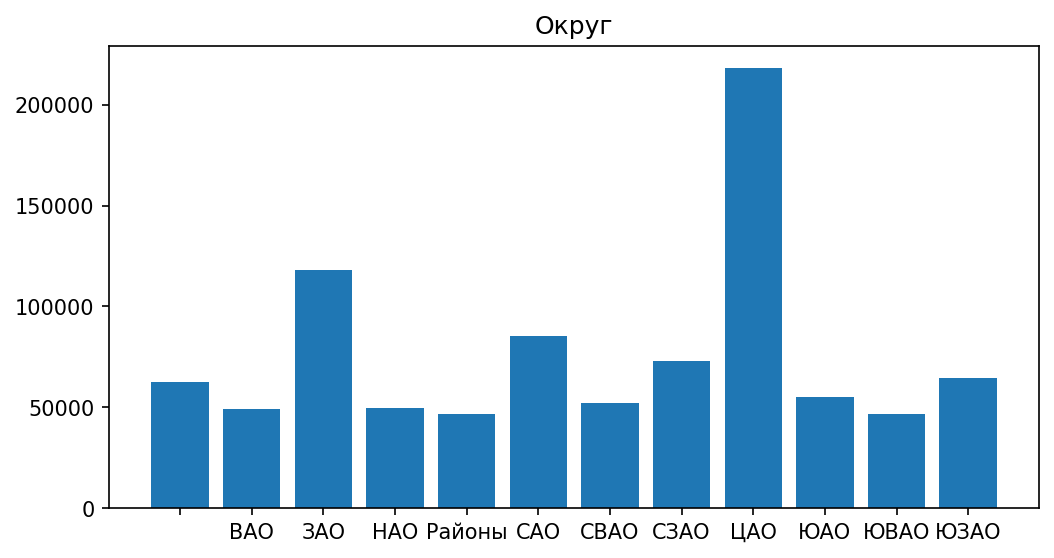

In [54]:
# Соотношение Округ \ средняя цена
plt.figure(figsize=(8, 4))

n_bars = np.arange(len(df['Округ'].unique())) 

grouped = pd.DataFrame(df.groupby(['Округ'])['Основная стоимость'].mean().round())

plt.title('Округ')
plt.bar(n_bars, grouped['Основная стоимость'])
plt.xticks(n_bars, grouped.index); 

In [55]:
# Исправляем косяк с разбиением комнатности квартр
#df['Количество комнат'] = [7 if df['Тип квартиры'].iloc[i] == 'Свободная планировка' else row
                                #for i, row in enumerate(df['Количество комнат'])]

In [56]:
# "Нормальный" подход к добавлению новой фичи по "метро"
my_dict =  {'Akadem' : ['Академическая'],
    'Aleks' : ['Алексеевская'],
    'Arbat' : [
        'Александровский сад',
        'Арбатская',
        'Боровицкая',
        'Смоленская',
    ],
    'Aeroport' : [
        'Аэропорт',
        'Динамо',
        'Красный Балтиец',
        'Петровский парк',
        'Сокол',
        'Петровский Парк',
    ],
    'Babushk' : ['Бабушкинская'],
    'Basmann' : [
        'Бауманская',
        'Курская',
        'Чистые пруды',
        'Чкаловская',
        'Электрозаводская',
        'Рубцовская',
    ],
    'Besskudnikovo' : [
        'Бескудниково',
        'Верхние Лихоборы',
        'Селигерская',
    ],
    'Bibirevo' : [
        'Алтуфьево',
        'Бибирево',
    ],
    'Birulevo_zapad' : ['Покровское'],
    'Bogorodsk' : [
        'Белокаменная',
        'Бульвар Рокоссовского',
    ],
    'Brateevo' : [
        'Алма-Атинская',
        'Борисово',
    ],
    'Butovo_sever' : [
        'Бульвар Дмитрия Донского',
        'Улица Старокачаловская',
    ],
    'Butovo_ug' : [
        'Бульвар адмирала Ушакова',
        'Бульвар Адмирала ушакова',
        'Бульвар адмирала ушакова',
        'Бунинская Аллея',
        'Бунинская аллея',
        'Бутово',
        'Улица Горчакова',
        'Улица Скобелевская',
    ],
    'Butirka' : [
        'Бутырская',
        'Улица Милашенкова',
        'Фонвизинская',
        'Бутырская',
        'Фонвизинская',
    ],
    'Vnukovo' : [
        'Рассказовка',
    ],
    'Voykovskaya' : [
        'Балтийская',
        'Войковская',
    ],
    'Zhulebino' : [
        'Выхино',
        'Жулебино',
        'Косино',
        'Котельники',
        'Лермонтовский проспект',
        'Юго-Восточная',
    ],
    'Gagarinskiy' : [
        'Площадь Гагарина',
        'Университет',
    ],
    'Golovinskiy' : [
        'Водный стадион'
    ],
    'Golyanovo' : [
        'Локомотив'
    ],
    'Danilovskiy' : [
        'Автозаводская',
        'ЗИЛ',
        'Технопарк',
        'Тульская',
    ],
    'Degunino_vostok' : [
        'Дегунино'
    ],
    'Dmitrovskiy' : [
        'Марк'
    ],
    'Donskoy' : [
        'Крымская',
        'Ленинский проспект',
        'Шаболовская',
    ],
    'Dorogomilovo' : [
        'Киевская',
        'Кутузовская',
        'Минская',
        'Парк Победы',
        'Студенческая',
        'Дорогомиловская',
    ],
    'Zamoskvorechie' : [
        'Добрынинская',
        'Новокузнецкая',
        'Павелецкая',
        'Серпуховская',
        'Третьяковская',
    ],
    'Zuzino' : [
        'Каховская',
        'Нахимовский Проспект',
        'Нахимовский проспект',
        'Севастопольская',
        'Зюзино',
        'Каховская',
        'Севастопольский проспект',
    ],
    'Zyablikovo' : [
        'Зябликово',
        'Красногвардейская',
        'Шипиловская',
    ],
    'Izmailovo' : [
        'Измайлово',
        'Измайловская',
        'Партизанская',
        'Первомайская',
        'Соколиная Гора',
    ],
    'Izmailovo_sever' : [
        'Щелковская'
    ],
    'Konkovo' : [
        'Беляево',
        'Коньково',
    ],
    'Koptevo' : [
        'Коптево',
        'Лихоборы',
    ],
    'Kosino_uhtomsk' : [
        'Лухмановская',
        'Улица Дмитриевского',
    ],

    'Krasnogorsk' : ['Мякинино', 'мякинино'],

    'Krasnoselsk' : [
        'Каланчёвская',
        'Комсомольская',
        'Красносельская',
        'Красные ворота',
        'Сретенский бульвар',
        'Тургеневская',
    ],
    'Krilatsk' : [
        'Крылатское'
    ],
    'Kuzminki' : [
        'Кузьминки'
    ],
    'Kuncevo' : [
        'Кропоткинская',
        'Кунцевская',
        'Кунцевская',
        'Молодежная',
        'Кунцевская',
    ],
    'Levoberezhniy' : [
        'Беломорская',
        'Речной вокзал',
        'Беломорская улица',
    ],
    'Lefortovo' : [
        'Авиамоторная',
        'Лефортово',
        'Москва-Товарная',
    ],
    'Lianozovo' : [
        'Лианозово'
    ],
    'Lublino' : [
        'Депо',
        'Кубанская',
        'Люблино',
    ],
    'Marfino' : [
        'Окружная'
    ],
    'Maryina_rosha' : [
        'Марьина Роща',
        'Марьина роща',
        'Шереметьевская',
    ],
    'Maryino' : [
        'Братиславская',
        'Курьяново',
        'Марьино',
        'Перерва',
    ],
    'Medvedkovo_sever' : [
        'Медведково'
    ],
    'Meshanskiy' : [
        'Кузнецкий мост',
        'Проспект Мира',
        'Рижская',
        'Сухаревская',
        'Трубная',
        'Ржевская',
    ],
    'Mitino' : [
        'Волоколамская',
        'Волоколамская',
        'Митино',
        'Пенягино',
        'Пятницкое шоссе',
    ],
    'Mozhaisk' : [
        'Рабочий Посёлок',
        'Рабочий поселок',
        'Рабочий посёлок',
        'Рабочий Поселок',
        'Сетунь',
        'Давыдково',
    ],
    'Moskvorechie_saburovo' : [
        'Москворечье',
    ],
    'Moskovsk' : [
        'Говорово',
        'Румянцево',
        'Саларьево',
    ],
    'Nagatino_sadovniki' : [
        'Каширская'
    ],
    'Nagatinsk_zatone' : [
        'Коломенская',
        'Кленовый бульвар',
    ],
    'Nagorn' : [
        'Варшавская',
        'Верхние Котлы',
        'Верхние котлы',
        'Нагатинская',
        'Нагорная',
    ],
    'Nekrasovka' : [
        'Некрасовка'
    ],
    'Nizhegorodsk' : [ 
        'Калитники',
        'Нижегородская',
        'Новохохловская',
    ],
    'Novogireevo' : [
        'Новогиреево'
    ],
    'Novokosino' : [
        'Новокосино'
    ],
    'Novoperedelkino' : [
        'Боровское шоссе',
        'Новопеределкино',
    ],
    'Obruchevsk' : [
        'Новые Черёмушки',
        'Воронцовская',
    ],
    'Orehovo_sever' : [
        'Орехово'
    ],
    'Orehovo_ug' : [
        'Домодедовская'
    ],
    'Ostankino' : [
        'ВДНХ',
        'Выставочный центр',
        'Телецентр',
        'Улица Академика Королёва',
        'Улица академика королева',
        'Улица Академика королева',
        'Улица академика Королева',
        'Улица академика королёва',
        'Улица Академика королёва',
        'Улица академика Королёва',
        'Улица Сергея Эйзенштейна',
    ],
    'Otradnoe' : [
        'Владыкино',
        'Отрадное',
    ],
    'Ochakovo_matveevsk' : [
        'Озёрная',
        'Озерная',
        'Аминьевское шоссе',
    ],
    'Perovo' : [
        'Андроновка',
        'Перово',
    ],
    'Pechatniki' : [
        'Печатники',
        'Угрешская',
        'Печатники',
    ],
    'Pokrovsk_streshnevo' : [
        'Спартак',
        'Тушинская',
    ],
    'Preobrazhensk' : [
        'Преображенская площадь',
        'Черкизовская',
    ],
    'Presniya' : [
        'Баррикадная',
        'Выставочная',
        'Деловой центр',
        'Краснопресненская',
        'Международная',
        'Тестовская',
        'Улицаа',
        'Шелепиха',
    ],
    'Vernadsk' : [
        'Проспект Вернадского',
        'Проспект Вернадского',
        'Улица Новаторов',
    ],
    'Ramenki' : [
        'Ломоносовский проспект',
        'Мичуринский проспект',
        'Раменки',
    ],
    'Rostokino' : [
        'Ростокино',
    ],
    'Ostafievo' : ['Остафьево'],
    'Ryazansk' : [
        'Окская',
        'Рязанский проспект',
        'Стахановская',
    ],
    'Savelovsk' : [
        'Дмитровская',
        'Савеловская',
    ],
    'Sviblovo' : [
        'Ботанический сад',
        'Свиблово',
    ],
    'Sokol' : [ 
        'Панфиловская',
        'Покровское-Стрешнево',
        'Стрешнево',
    ],
    'Sokolinaya_gora' : [
        'Семеновская',
        'Шоссе Энтузиастов',
        'Соколиная гора'
        
    ],
    'Sokolniki' : [
        'Сокольники',
        'Стромынка',
    ],
    'Solncevo' : ['Солнцево'],
    'Sosensk' : [
        'Коммунарка',
        'Ольховая',
        'Прокшино',
        'Филатов Луг',
    ],
    'Strogino' : ['Строгино'],
    'Taganka' : [
        'Крестьянская застава',
        'Марксистская',
        'Площадь Ильича',
        'Пролетарская',
        'Римская',
        'Таганская',
    ],
    'Tverskaya' : [
        'Белорусская',
        'Библиотека имени Ленина',
        'Достоевская',
        'Китай-город',
        'Лубянка',
        'Маяковская',
        'Менделеевская',
        'Новослободская',
        'Охотный ряд',
        'Площадь Революции',
        'Пушкинская',
        'Тверская',
        'Театральная',
        'Цветной бульвар',
        'Чеховская',
    ],
    'Tekstili' : [
        'Волжская',
        'Текстильщики',
        'Текстильщики',
    ],
    'Timka' : [
        'Гражданская',
        'Петровско-Разумовская',
        'Тимирязевская',
        'Петровско-Разумовская',
    ],
    'Troparevo_nikulino' : [
        'Тропарёво',
        'Тропарево',
        'Юго-Западная',
    ],
    'Tushino_sever' : [
        'Планерная'
    ],
    'Tushino_ug' : [
        'Сходненская',
        'Трикотажная',
    ],
    'File_park' : [
        'Багратионовская',
        'Филевский парк',
        'Фили',
    ],
    'Fili_davidkovo' : [
        'Пионерская',
        'Славянский бульвар',
    ],
    'Hamovniki' : [
        'Воробьевы горы',
        'Лужники',
        'Парк Культуры',
        'Спортивная',
        'Фрунзенская',
        'Волхонка',
        'Плющиха',
    ],
    'Hovrino' : [
        'Ховрино'
    ],
    'Horoshevo_mnemniki' : [
        'Мнёвники',
        'Народное Ополчение',
        'Народное ополчение',
        'Нижние Мневники',
        'Терехово',
        'Улица Народного ополчения',
    ],
    'Horoshevsk' : [
        'Беговая',
        'Зорге',
        'Полежаевская',
        'Хорошёво',
        'Хорошево',
        'Хорошёвская',
        'Хорошевская',
        'ЦСКА',
        'Баррикадная',
    ],
    'Caricino' : [
        'Кантемировская',
        'Царицыно',
    ],
    'Cheremushki' : [
        'Калужская',
        'Профсоюзная',
    ],
    'Chertanovo_sever' : [
    'Чертановская',
    'Южная',
    ],
    'Chertanovo_centr' : [
        'Пражская'
    ],
    'Chertanovo_ug' : [
        'Аннино',
        'Красный Строитель',
        'Лесопарковая',
        'Улица академика Янгеля',
        'Улица Академика Янгеля',
        'Улица академика янгеля'
    ],
    'Sherbinka' : [
        'Щербинка'
    ],
    'Shukino' : [
        'Октябрьское поле',
        'Щукинская',
    ],
    'Uzhnoportoviy' : [
        'Волгоградский проспект',
        'Дубровка',
        'Кожуховская',
    ],
    'Yakimanka' : [
        'Октябрьская',
        'Полянка',
    ],
    'Yasenevo' : [
        'Битцевский парк',
        'Новоясеневская',
        'Теплый стан',
        'Теплый Стан',
        'Ясенево',
    ],
    'Anikeevka' : ['Аникеевка'],

    'Bakovka' : ['Баковка'],
    
    'Bitca' : ['Битца'],
    
    'Vodniki' : ['Водники'],
    
    'Dolgoprudniy' : ['Долгопрудная'],
    
    'Krasnogorsk' : ['Красногорская'],
    
    'Lobnya' : ['Лобня'],
    
    'Nahabino' : ['Нахабино'],
    
    'Nemchinovka' : ['Немчиновка'],
    
    'Novodachnaya' : ['Новодачная'],
    
    'Odincovo' : ['Одинцово'],
    
    'Opaliha' : ['Опалиха'],
    
    'Pavshino' : ['Павшино'],
    
    'Podolsk' : ['Подольск'],
    
    'Silikatnaya' : ['Силикатная'],
    
    'Skolkovo' : ['Сколково'],
    
    'Hlebnikovo' : ['Хлебниково'],
    
    'Sherementevo' : ['Шереметьевская'],
    '1905 goda' : ['Улица 1905 года']

}

In [57]:
# Корявая реализация list comprehension 
df['Район'] = [str([key for key, val in my_dict.items() if row in val]) if row == row else None for row in df['Метро']]
df['Район'] = [i[2:-2] for i in df['Район'] ]

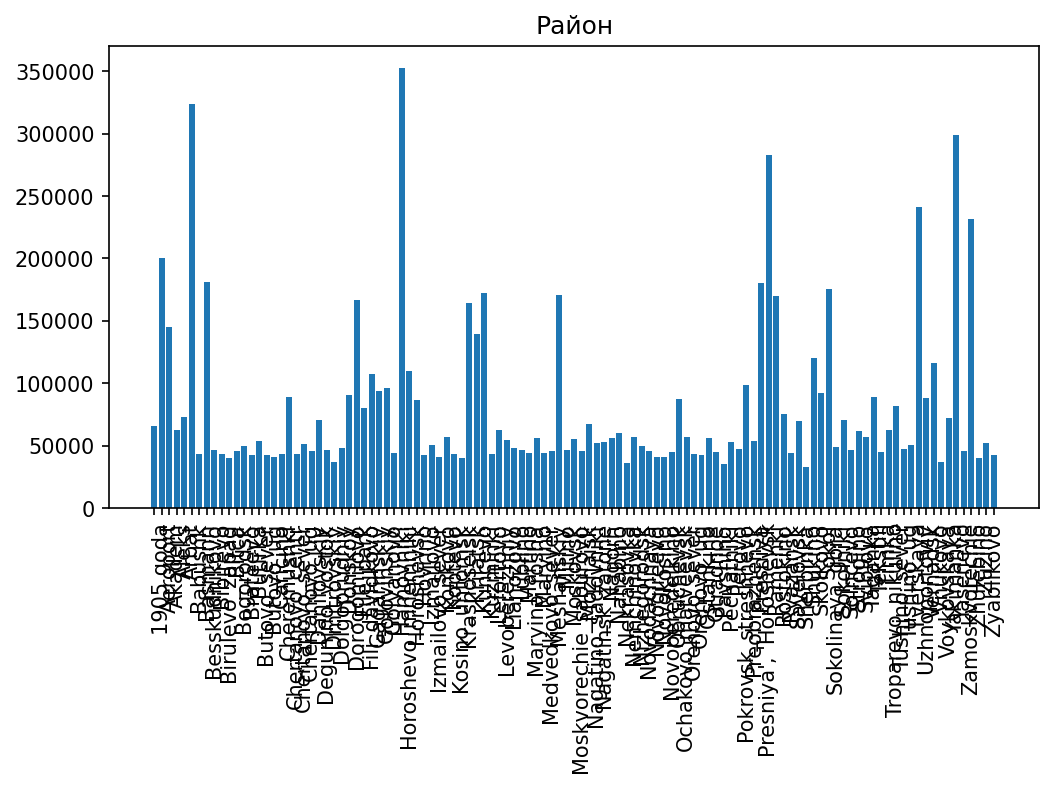

In [58]:
# Некрасивое cоотношение Район \ средняя цена
plt.figure(figsize=(8, 4))

n_bars = np.arange(len(df['Район'].unique())) 

grouped = pd.DataFrame(df.groupby(['Район'])['Основная стоимость'].mean().round())

plt.title('Район')
plt.bar(n_bars, grouped['Основная стоимость'])
plt.xticks(n_bars, grouped.index); 
plt.xticks(rotation=90)
plt.show()

In [59]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный,Округ,Район
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.00,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0,ЦАО,Arbat
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.50,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1,ЦАО,Arbat
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0,ЦАО,Arbat
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0,ЦАО,Arbat
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.90,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0,ЦАО,Arbat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0,НАО,Moskovsk
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.98,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0,ЗАО,Solncevo
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",2.98,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0,ЗАО,Solncevo
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1,ЗАО,Solncevo


In [58]:
### Перевод названия колонок на английский язык

In [62]:
new_names = [
    "Rooms amount",
    "Housing type",
    "Metro",
    "Adress",
    "Parking",
    "Repair",
    "Balcony",
    "Windows",
    "Allowed with kids/animals",
    "Additional",
    "Ceiling height, m",
    "Trash chute",
    'Square, m',
    'Porch',
    'Main price',
    'Additional Price Information',
    'Loggia',
    'Building type',
    "Floors in the building",
    "Apartment floor",
    "Passenger elevator",
    "Cargo elevator",
    "Combined bathroom",
    'Separated toilet and bathroom'
    'Disctrict',
    'Area'
]

df.columns = new_names
df.head()

,Rooms amount,Housing type,Metro,Adress,Parking,Repair,Balcony,Windows,Allowed with kids/animals,Additional,"Ceiling height, m",Trash chute,"Square, m",Porch,Main price,Additional Price Information,Loggia,Building type,Floors in the building,Apartment floor,Passenger elevator,Cargo elevator,Combined bathroom,Separated toilet and bathroomDisctrict,Area
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0,ЦАО,Arbat
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1,ЦАО,Arbat
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0,ЦАО,Arbat
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0,ЦАО,Arbat
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0,ЦАО,Arbat


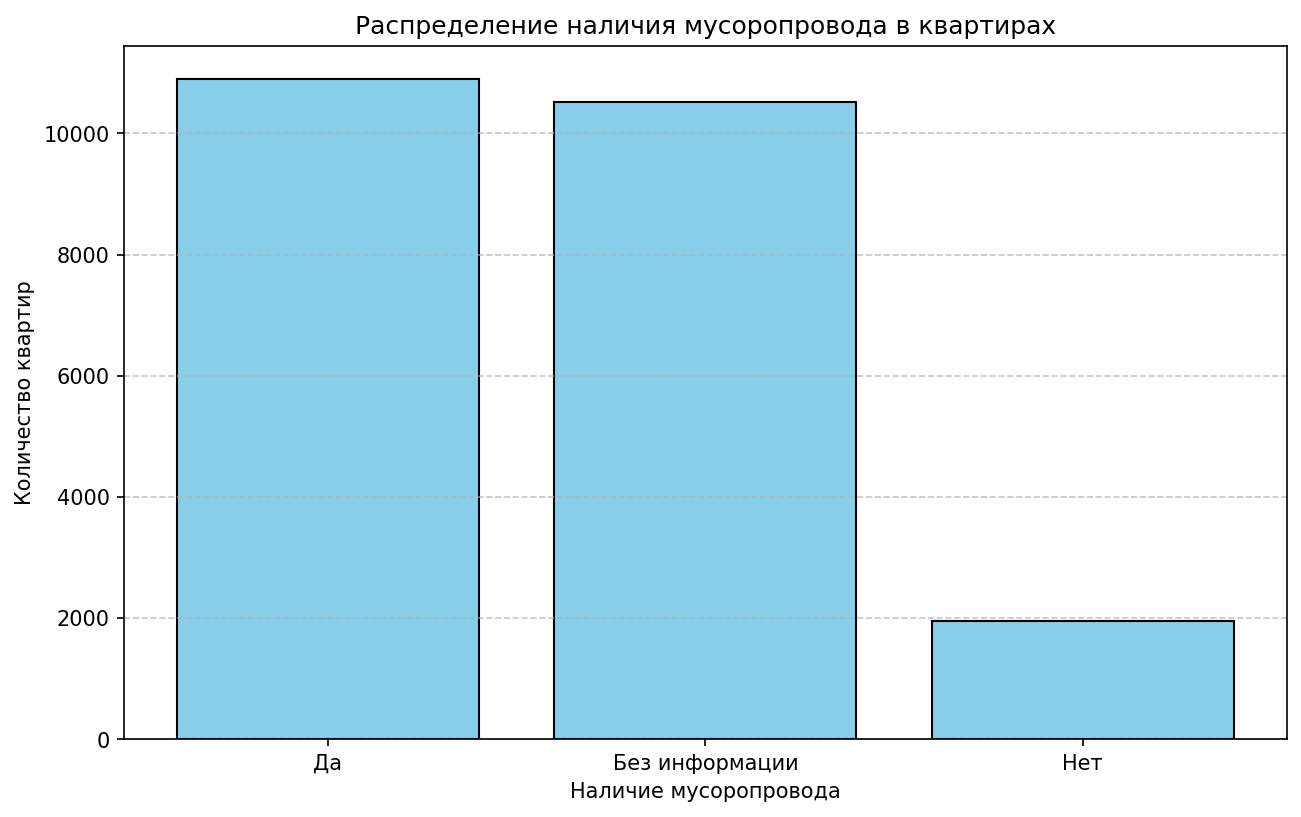

In [65]:
trash_chute_counts = df["Trash chute"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(
    trash_chute_counts.index,
    trash_chute_counts.values,
    color="skyblue",
    edgecolor="black",
)
plt.title("Распределение наличия мусоропровода в квартирах")
plt.xlabel("Наличие мусоропровода")
plt.ylabel("Количество квартир")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

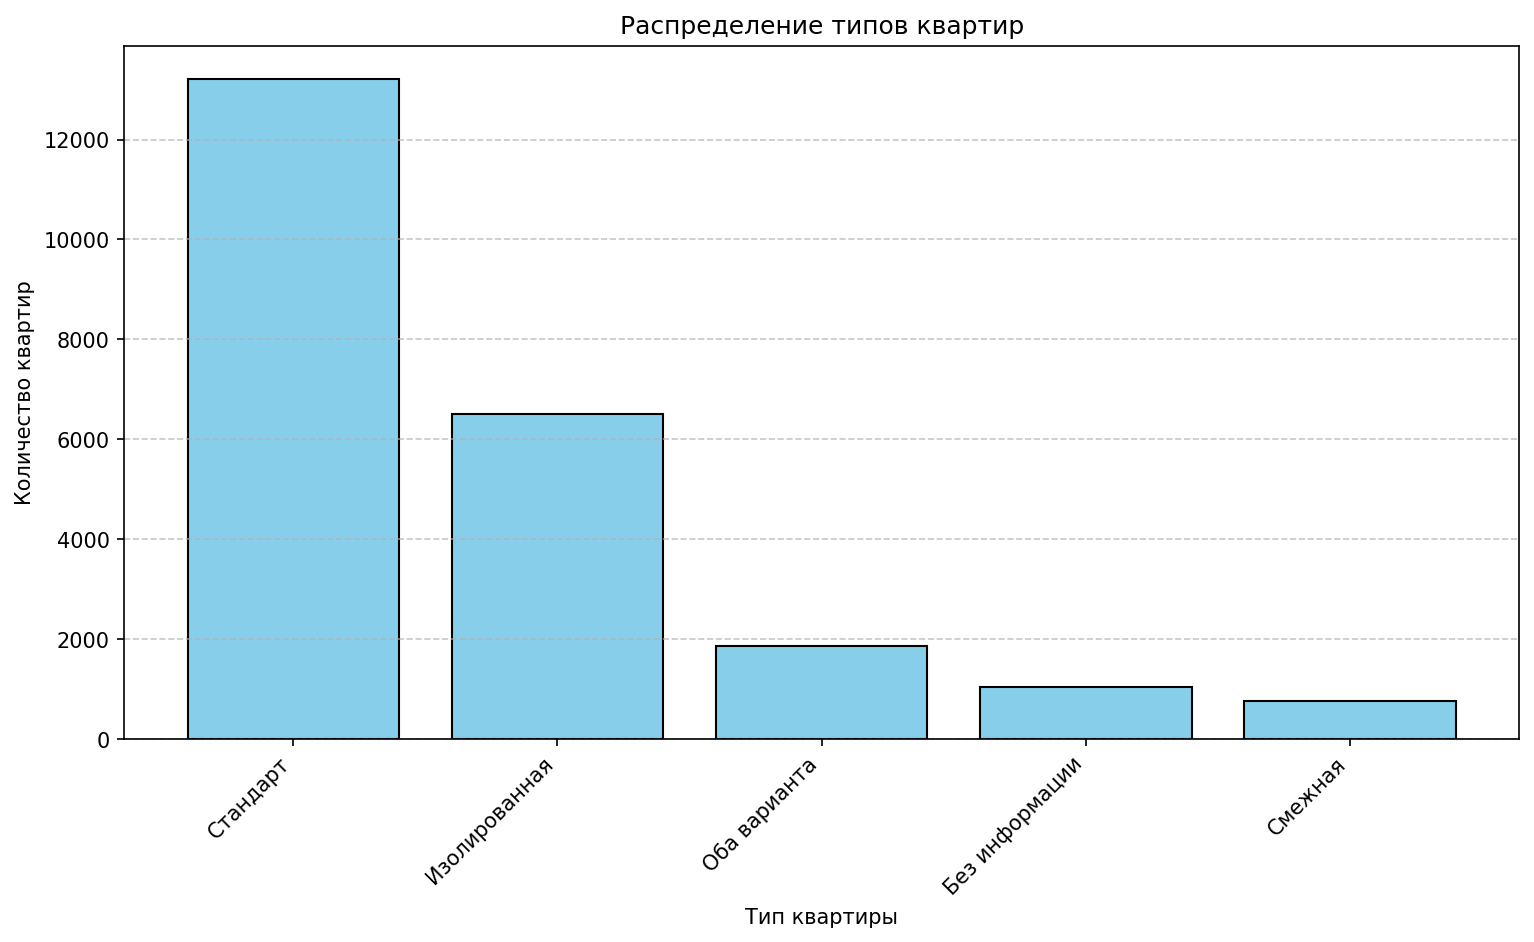

In [67]:
apartment_type_counts = df["Housing type"].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(
    apartment_type_counts.index,
    apartment_type_counts.values,
    color="skyblue",
    edgecolor="black",
)
plt.title("Распределение типов квартир")
plt.xlabel("Тип квартиры")
plt.ylabel("Количество квартир")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

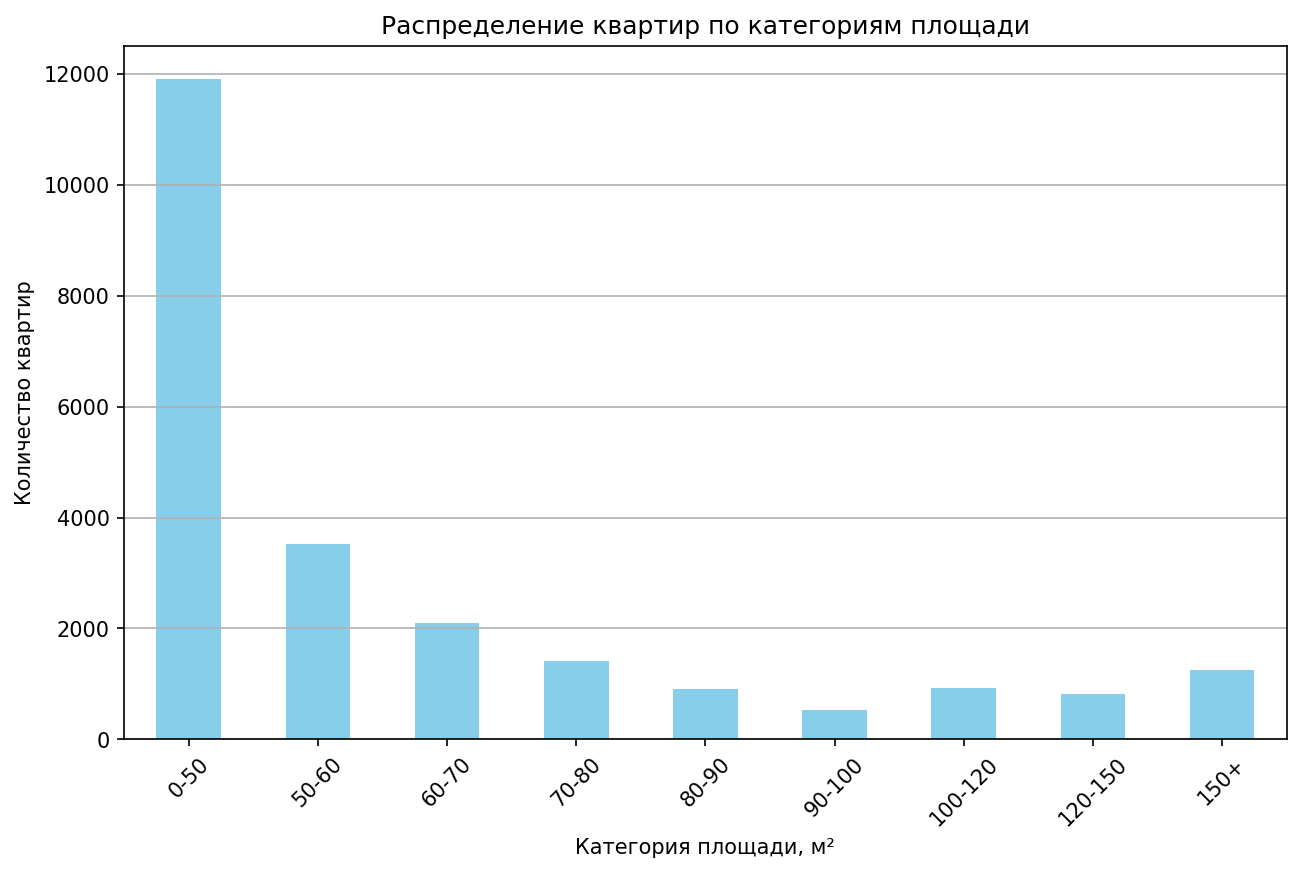

In [69]:
# Преобразование всех значений в столбце в число с плавающей точкой
df["Square, m"] = pd.to_numeric(df["Square, m"], errors='coerce')

bins = [0, 50, 60, 70, 80, 90, 100, 120, 150, np.inf]
labels = [
    "0-50",
    "50-60",
    "60-70",
    "70-80",
    "80-90",
    "90-100",
    "100-120",
    "120-150",
    "150+",
]


df["Square Category"] = pd.cut(
    df["Square, m"], bins=bins, labels=labels, right=False
)


plt.figure(figsize=(10, 6))
df["Square Category"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Распределение квартир по категориям площади")
plt.xlabel("Категория площади, м²")
plt.ylabel("Количество квартир")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

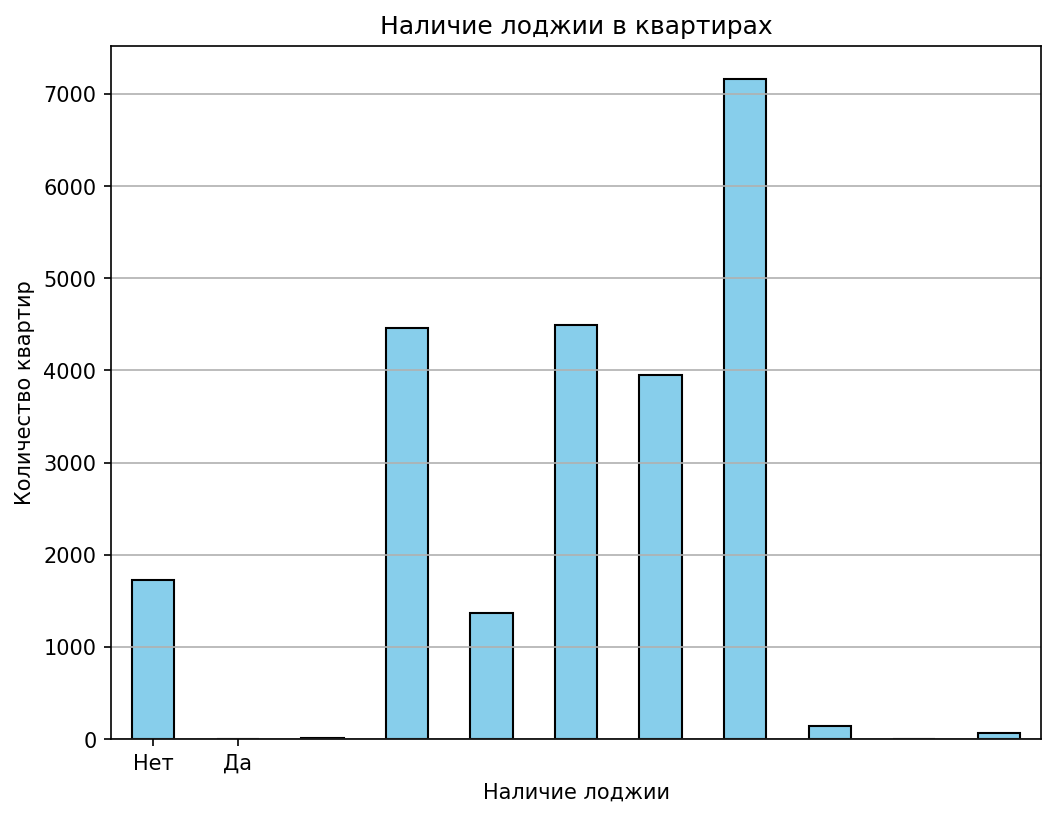

In [70]:
porch_counts = df["Loggia"].value_counts().sort_index()

plt.figure(figsize=(8, 6))
porch_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Наличие лоджии в квартирах")
plt.xlabel("Наличие лоджии")
plt.ylabel("Количество квартир")
plt.xticks([0, 1], ["Нет", "Да"], rotation=0)
plt.grid(axis="y")
plt.show()

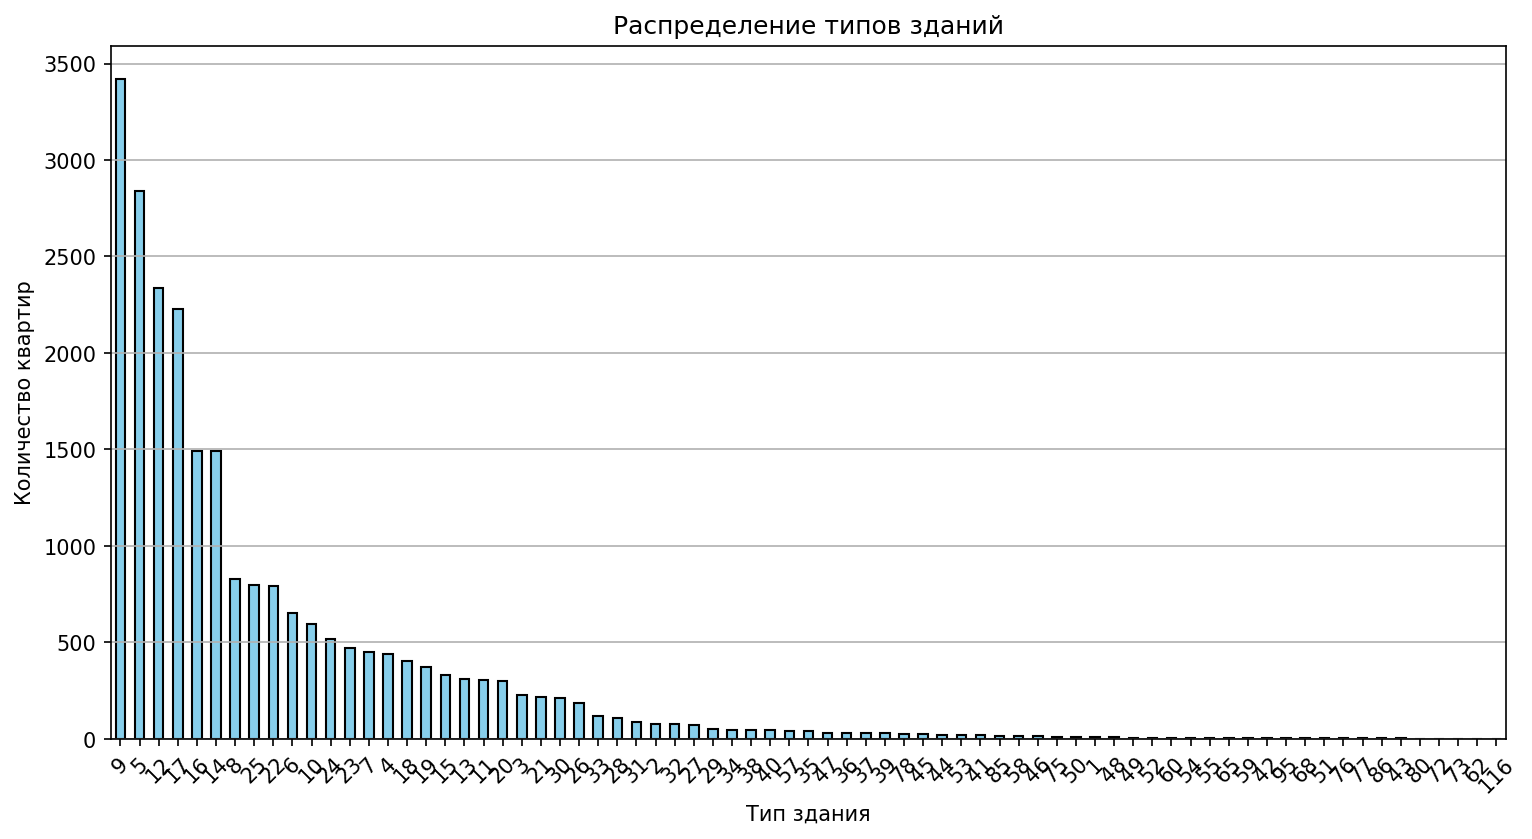

In [71]:
# Подготовка данных для графика
building_type_counts = df["Building type"].value_counts()

# Создание барплота
plt.figure(figsize=(12, 6))
building_type_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Распределение типов зданий")
plt.xlabel("Тип здания")
plt.ylabel("Количество квартир")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

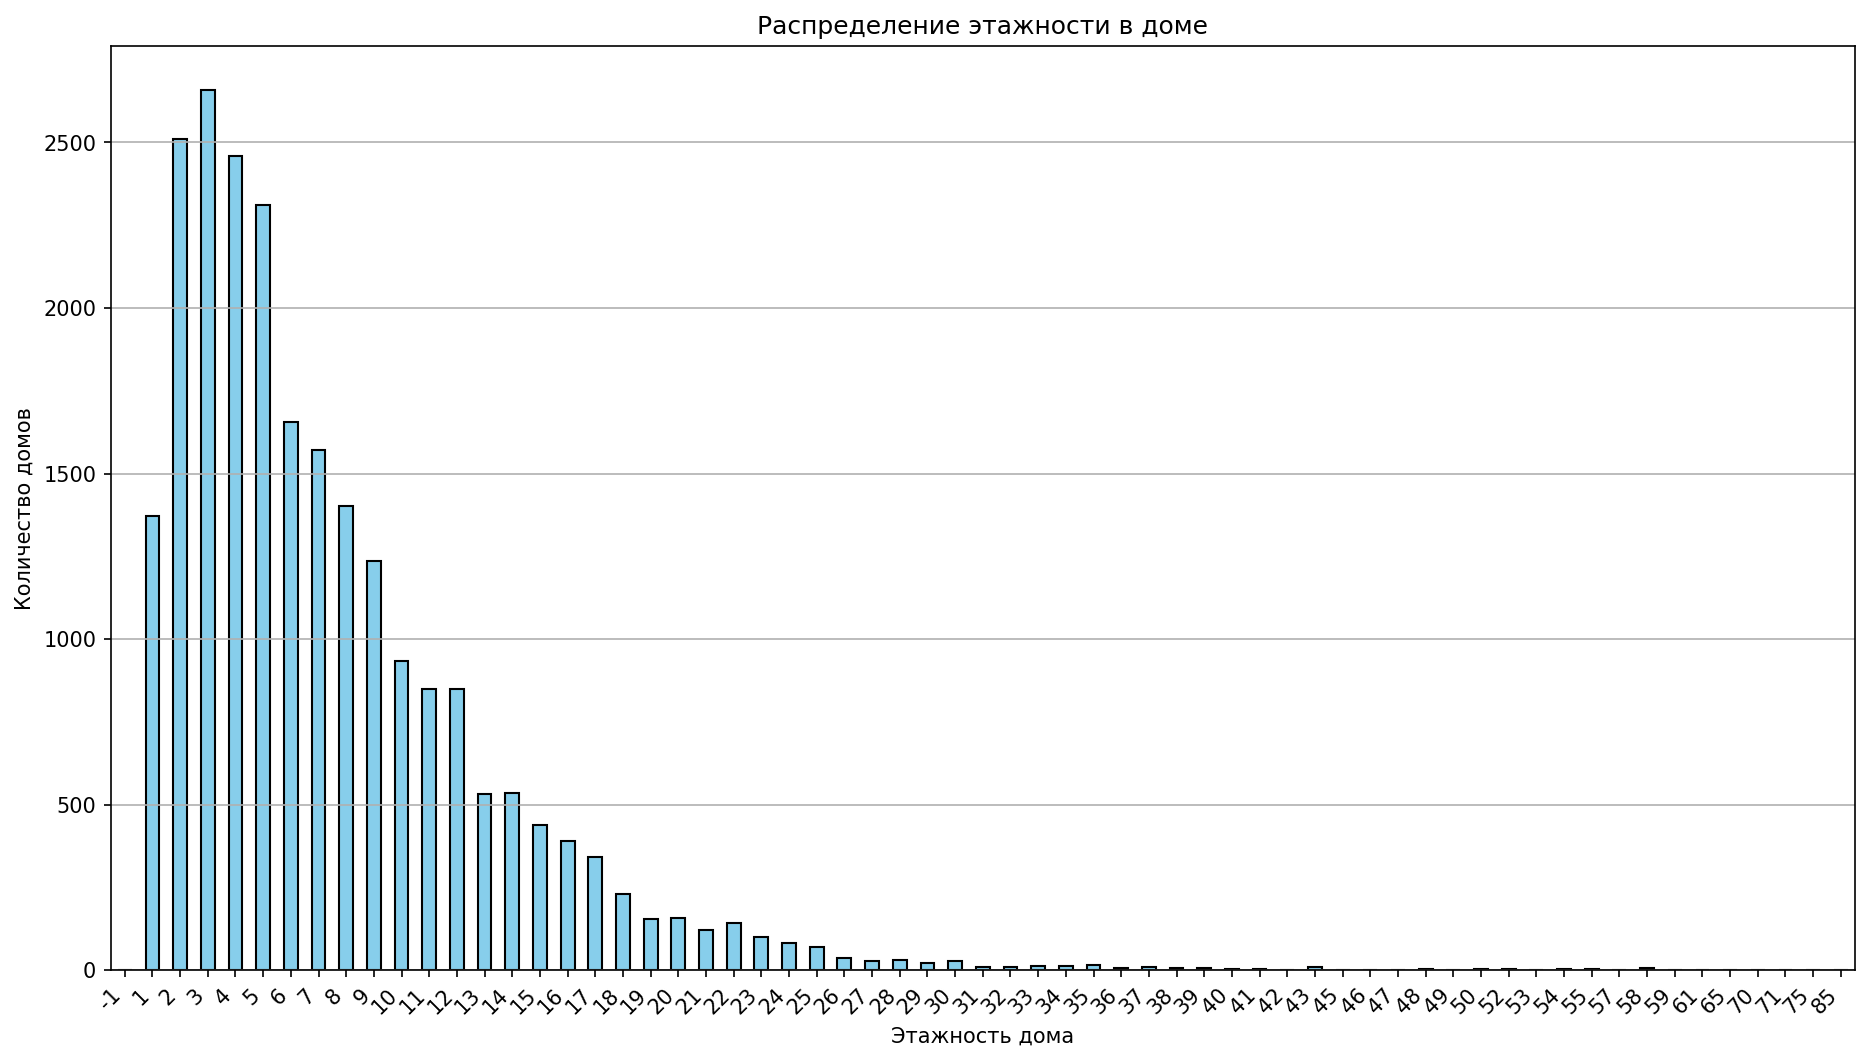

In [72]:

floors_count = df["Floors in the building"].value_counts().sort_index()


plt.figure(figsize=(15, 8))  
bars = floors_count.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Распределение этажности в доме")
plt.xlabel("Этажность дома")
plt.ylabel("Количество домов")


plt.xticks(
    ticks=range(len(floors_count)), labels=floors_count.index, rotation=45, ha="right"
)  

plt.grid(axis="y")
plt.show()

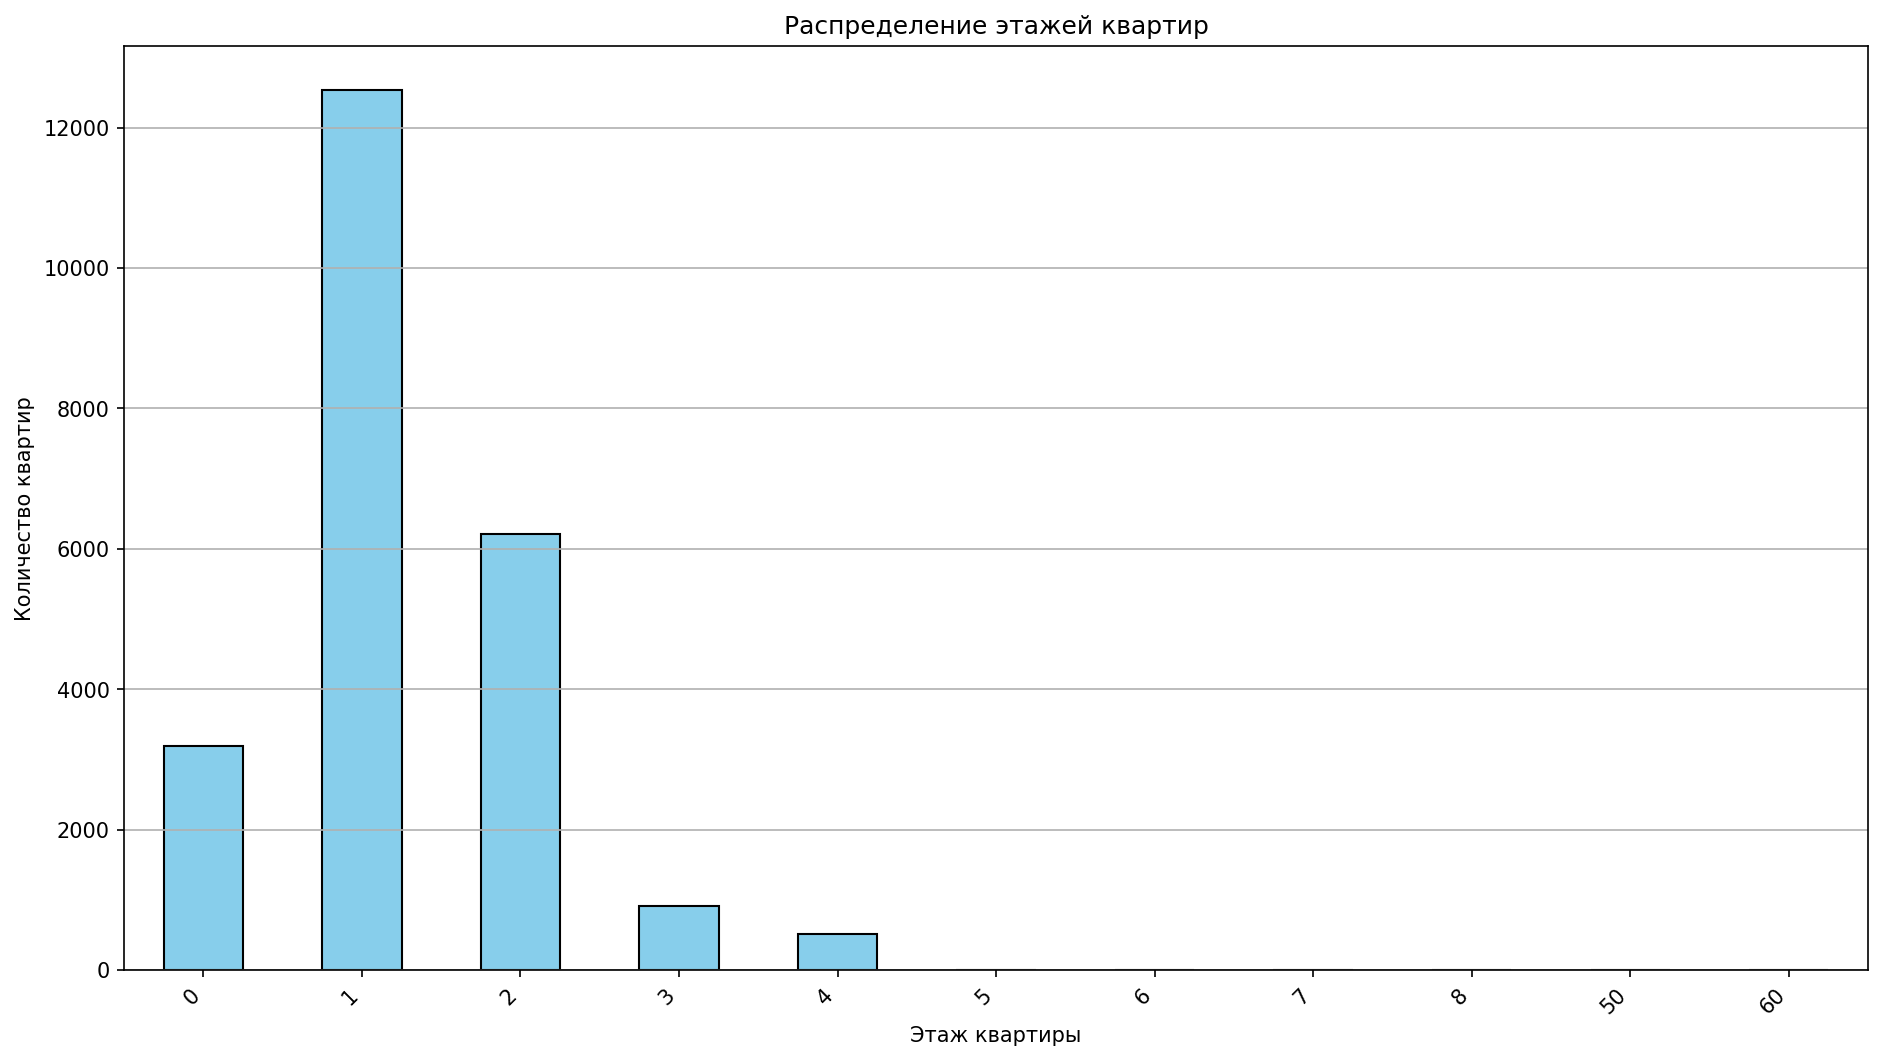

In [73]:
apartment_floors = df["Apartment floor"].value_counts().sort_index()


plt.figure(figsize=(15, 8))  
bars = apartment_floors.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Распределение этажей квартир")
plt.xlabel("Этаж квартиры")
plt.ylabel("Количество квартир")


plt.xticks(
    ticks=range(len(apartment_floors)),
    labels=apartment_floors.index,
    rotation=45,
    ha="right",
)  

plt.grid(axis="y")

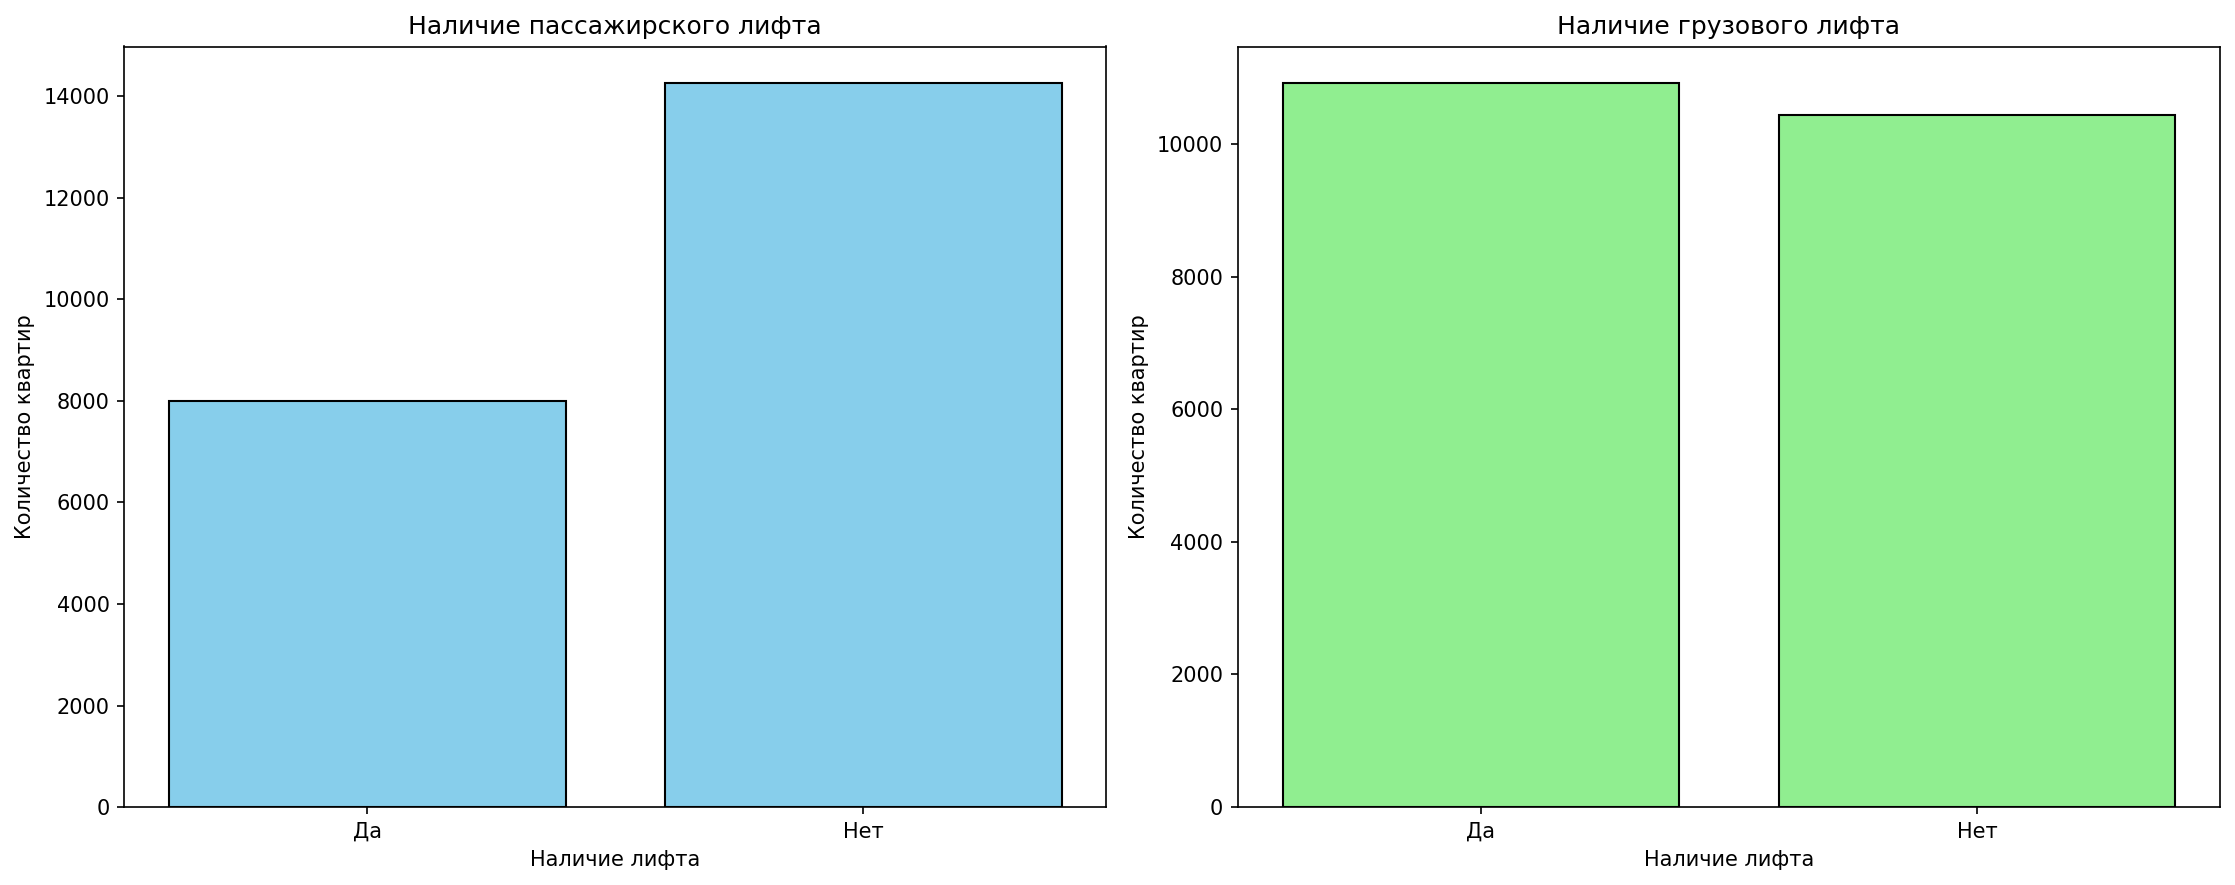

In [74]:
df["Passenger elevator"] = df["Passenger elevator"].map({0: "Нет", 1: "Да"})
df["Cargo elevator"] = df["Cargo elevator"].map({0: "Нет", 1: "Да"})


passenger_elevator = df["Passenger elevator"].value_counts().sort_index()
cargo_elevator = df["Cargo elevator"].value_counts().sort_index()


fig, ax = plt.subplots(1, 2, figsize=(15, 6))


ax[0].bar(
    passenger_elevator.index,
    passenger_elevator.values,
    color="skyblue",
    edgecolor="black",
)
ax[0].set_title("Наличие пассажирского лифта")
ax[0].set_xlabel("Наличие лифта")
ax[0].set_ylabel("Количество квартир")


ax[1].bar(
    cargo_elevator.index, cargo_elevator.values, color="lightgreen", edgecolor="black"
)
ax[1].set_title("Наличие грузового лифта")
ax[1].set_xlabel("Наличие лифта")
ax[1].set_ylabel("Количество квартир")


plt.tight_layout()




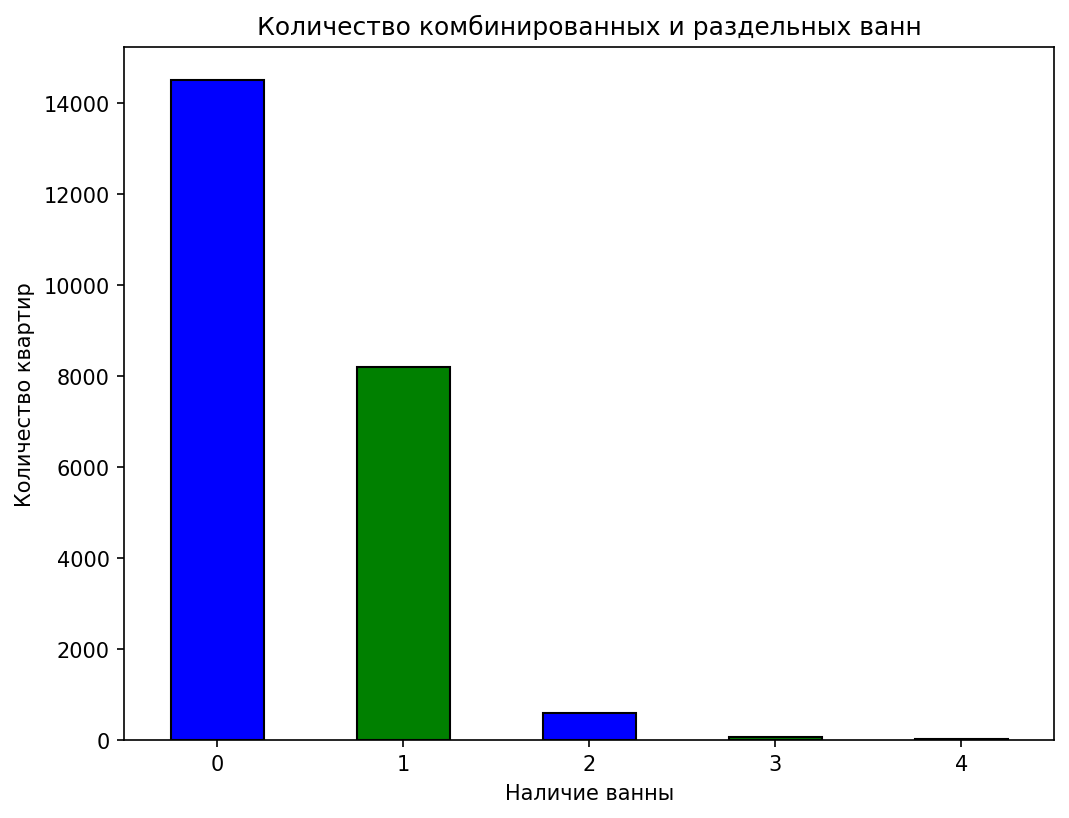

In [75]:
bathroom_counts = df["Combined bathroom"].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
bathroom_counts.plot(kind="bar", color=["blue", "green"], edgecolor="black")
plt.title("Количество комбинированных и раздельных ванн")
plt.xlabel("Наличие ванны")
plt.ylabel("Количество квартир")
plt.xticks(rotation=0)  # поворот подписей оси x для удобства чтения
plt.show()

In [76]:
# Сохраняем DataFrame в файл CSV
df.to_csv('Data.csv', index=False)